In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from category_encoders import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import xgboost
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib

import warnings
warnings.simplefilter(action="ignore")


ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 

8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
data=pd.read_csv("/Users/USER/Documents/DATASETS/Credit_default_dataset.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


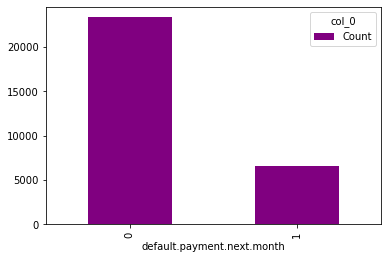

In [6]:
#visualization of the target variable
print(data['default.payment.next.month'].value_counts())
pd.crosstab(data['default.payment.next.month'],'Count').plot(kind='bar',color='Purple');

In [7]:
x=data.drop(['default.payment.next.month'],axis=1)
y=data['default.payment.next.month']

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=23,stratify=y)

In [9]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((22500, 24), (7500, 24), (22500,), (7500,))

In [10]:
ytrain.value_counts()

0    17523
1     4977
Name: default.payment.next.month, dtype: int64

### EXPLORATORY DATA ANALYSIS

In [11]:
df=xtrain.copy()
target=ytrain.copy()

In [12]:
gender_map={1:'Male',2:'Female'}

education_map={1:'Graduate School', 2:'University', 3:'High School', 4:'Others', 5:'Unknown', 6:'Unknown'}

partner_map={1:'Married', 2:'Single', 3:'Others'}

default_map={1:'Default', 0:'No_default'}

df['SEX']=df['SEX'].map(gender_map)
df['EDUCATION']=df['EDUCATION'].map(education_map)
df['MARRIAGE']=df['MARRIAGE'].map(partner_map)
target=target.map(default_map)

In [13]:
df['SEX']

7858       Male
2158     Female
20456      Male
25454    Female
11016      Male
          ...  
28871    Female
29106    Female
27891    Female
16114    Female
23762    Female
Name: SEX, Length: 22500, dtype: object

In [14]:
df['AGE'].min(),df['AGE'].max()

(21, 79)

In [15]:
binss=np.linspace(df['AGE'].min(),df['AGE'].max(),4)
labelss=['Young Adults','Adults','Senior citizens']
df['AGE_group']=pd.cut(df['AGE'],bins=binss,labels=labelss,include_lowest=True)
df['AGE_group']=df['AGE_group'].astype('object')

In [16]:
cat=df.select_dtypes(include='object')
num=df.select_dtypes(include='number')

<AxesSubplot:>

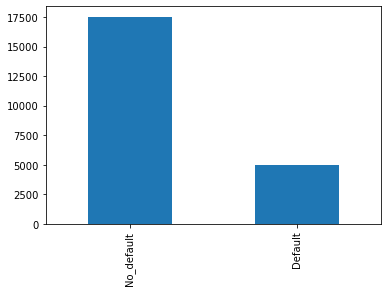

In [17]:
#distribution of target variable
target.value_counts().plot(kind='bar')

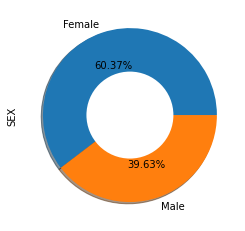

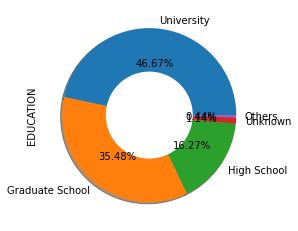

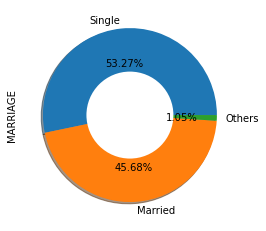

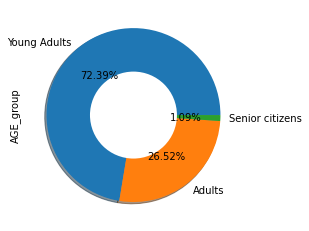

In [18]:
#visualization of categorical columns
for i in cat.columns:
    plt.figure()
    cat[i].value_counts().plot(kind='pie',autopct='%1.2f%%',shadow=True)
    circle=plt.Circle((0,0),0.50,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(circle)
    plt.show()

In [19]:
df['SEX'].groupby(target).count()

default.payment.next.month
Default        4977
No_default    17523
Name: SEX, dtype: int64

In [20]:
cols=df[['SEX', 'EDUCATION', 'MARRIAGE','AGE_group']]

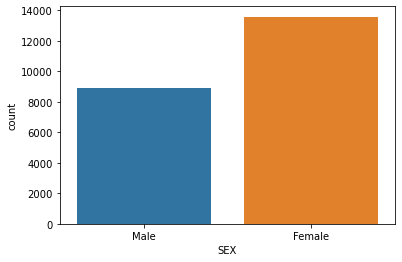

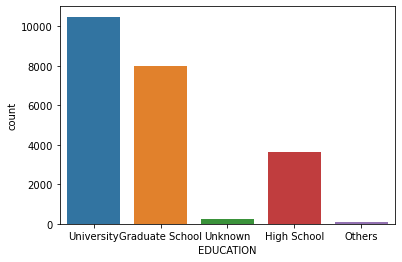

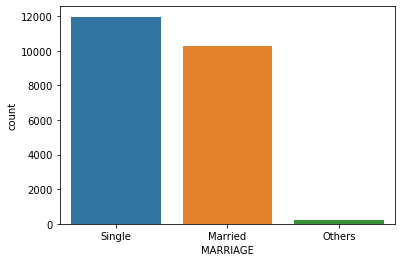

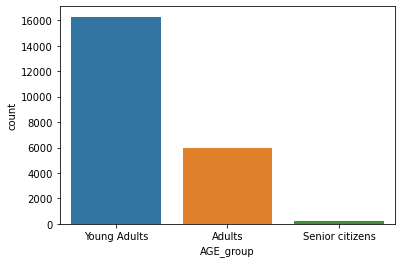

In [21]:
#visualization of categorical columns
for i in cols.columns:
    plt.figure()
    sns.countplot(x=i,data= cols)


<Figure size 432x288 with 0 Axes>

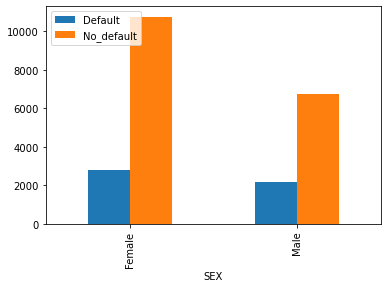

<Figure size 432x288 with 0 Axes>

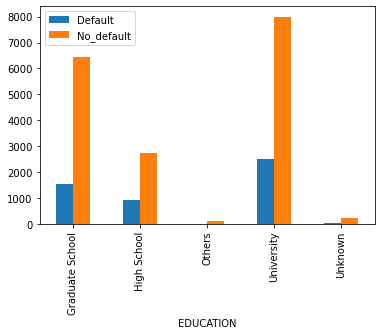

<Figure size 432x288 with 0 Axes>

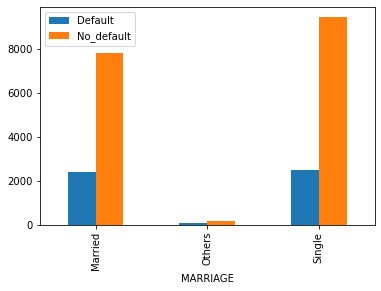

<Figure size 432x288 with 0 Axes>

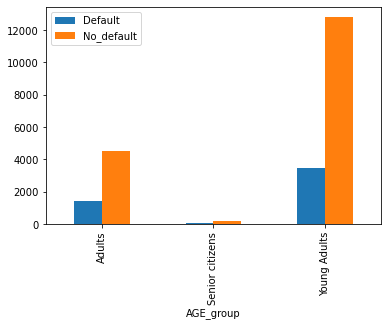

In [22]:
#relationship between categorical columns and target columns
for i in cols.columns:
    plt.figure()
    pd.crosstab(cols[i],target).plot(kind='bar')
    plt.legend(loc='upper left');

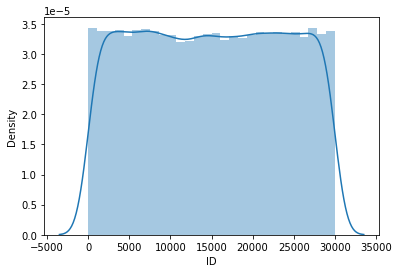

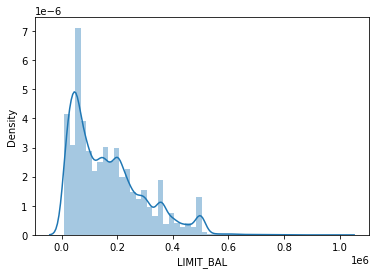

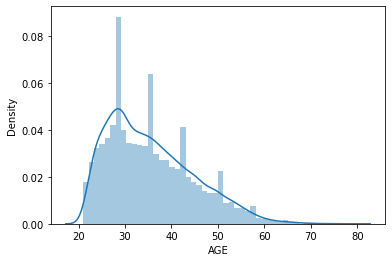

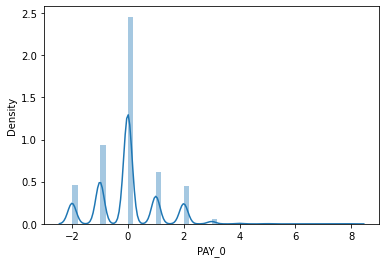

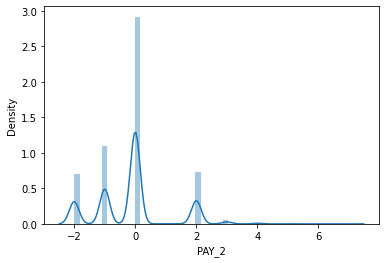

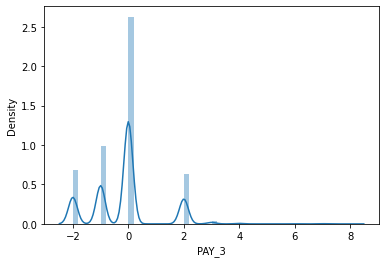

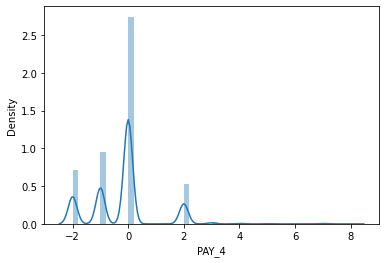

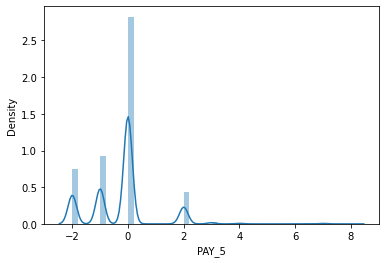

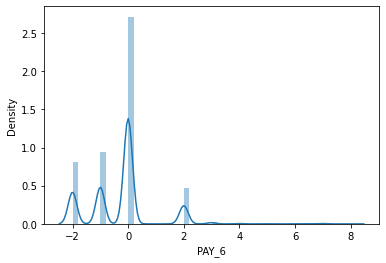

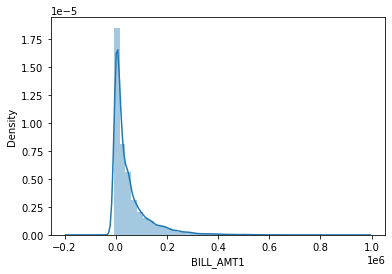

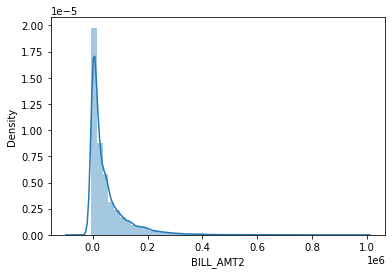

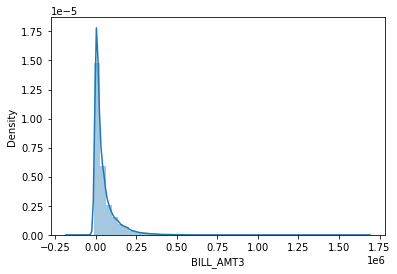

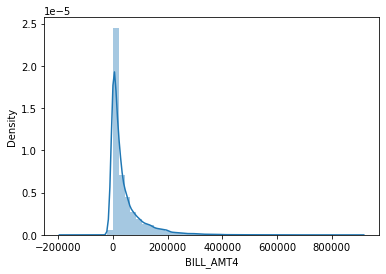

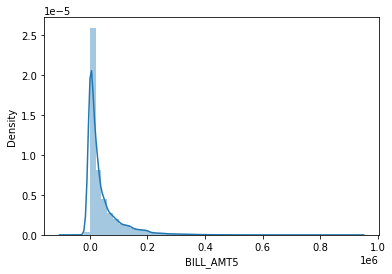

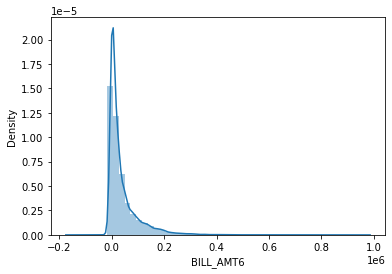

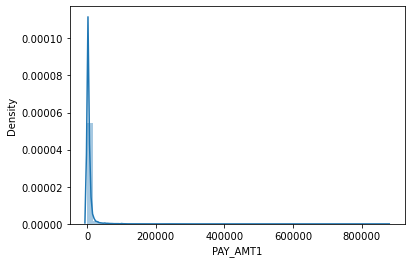

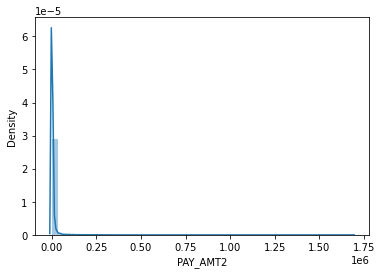

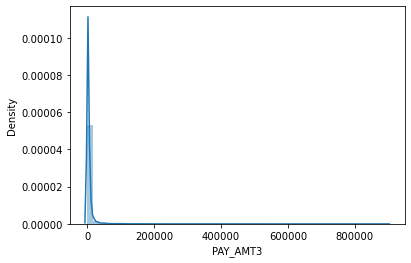

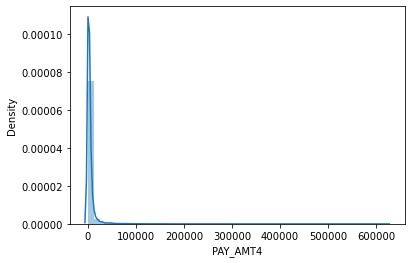

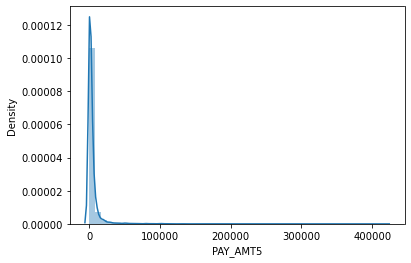

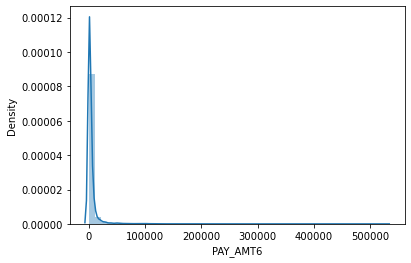

In [23]:
#distribution of numerical columns before outlier removal
for i in num.columns:
    plt.figure()
    sns.distplot(df[i])


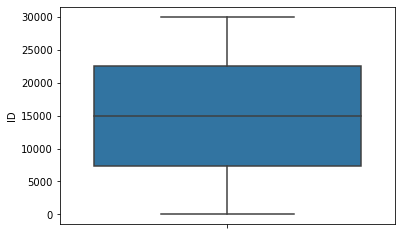

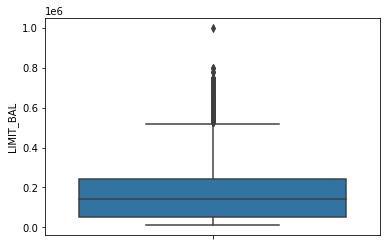

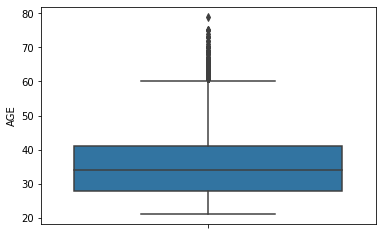

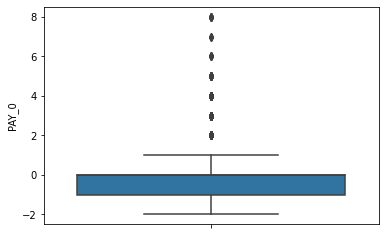

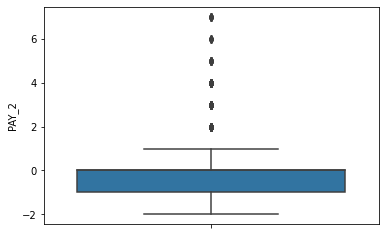

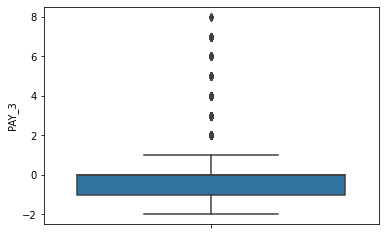

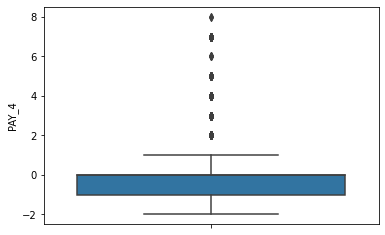

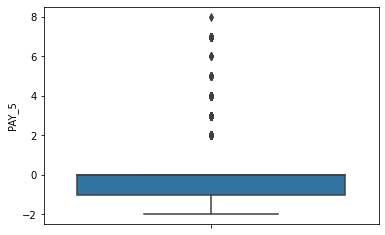

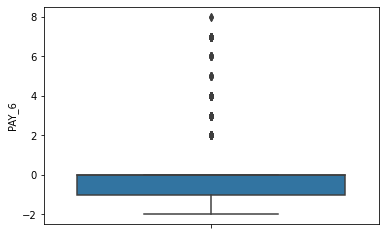

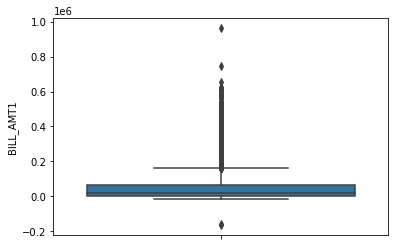

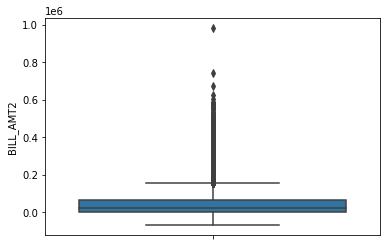

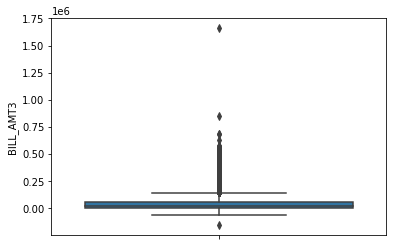

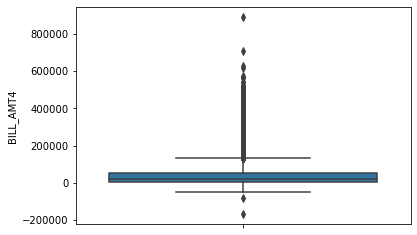

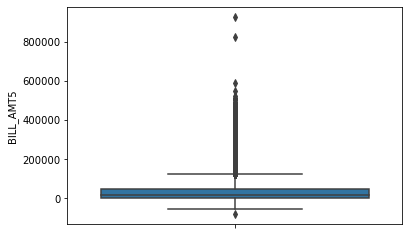

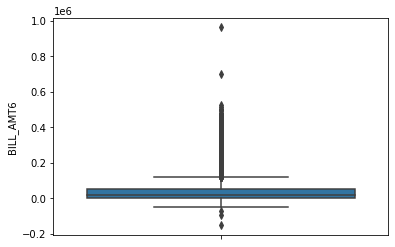

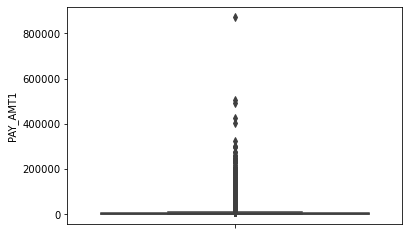

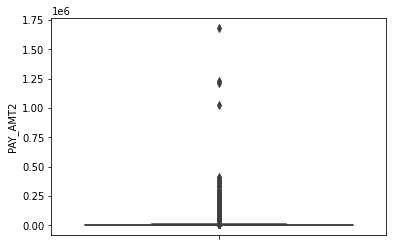

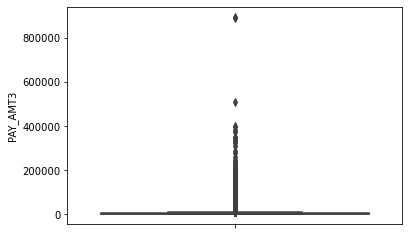

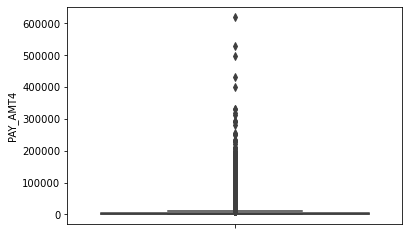

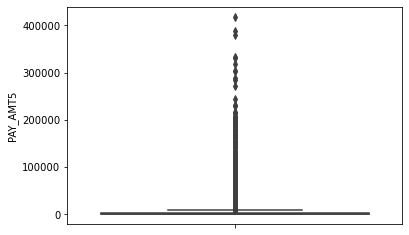

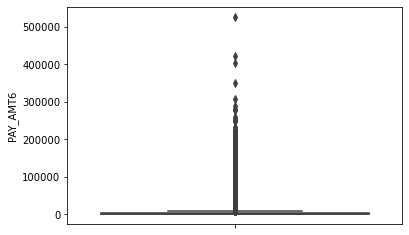

In [24]:
#dealing with outliers
for i in num.columns:
    plt.figure()
    sns.boxplot(y=df[i])

In [25]:
#PIVOT TABLE
for k in num.columns[1:]:
    p=df.pivot_table(k,target,aggfunc=np.mean)
    print('_________________________________________\n',p)

_________________________________________
                                 LIMIT_BAL
default.payment.next.month               
Default                     129179.762909
No_default                  177760.999829
_________________________________________
                                   AGE
default.payment.next.month           
Default                     35.764919
No_default                  35.425270
_________________________________________
                                PAY_0
default.payment.next.month          
Default                     0.673900
No_default                 -0.210181
_________________________________________
                                PAY_2
default.payment.next.month          
Default                     0.469962
No_default                 -0.300063
_________________________________________
                                PAY_3
default.payment.next.month          
Default                     0.363874
No_default                 -0.315699
_____________________

### PREPROCESSING

In [26]:
#checking for null values
xtrain.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [27]:
#checking for duplicate data
xtrain[xtrain.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6


In [28]:
#feature engineering
binss=np.linspace(xtrain['AGE'].min(),xtrain['AGE'].max(),4)
labelss=['Young Adults','Adults','Senior citizens']
xtrain['AGE_group']=pd.cut(xtrain['AGE'],bins=binss,labels=labelss,include_lowest=True)
xtrain['AGE_group']=xtrain['AGE_group'].astype('object')

In [29]:
gender_map={1:'Male',2:'Female'}

education_map={1:'Graduate School', 2:'University', 3:'High School', 4:'Others', 5:'Unknown', 6:'Unknown'}

partner_map={1:'Married', 2:'Single', 3:'Others'}

default_map={1:'Yes', 0:'No'}

xtrain['SEX']=xtrain['SEX'].map(gender_map)
xtrain['EDUCATION']=xtrain['EDUCATION'].map(education_map)
xtrain['MARRIAGE']=xtrain['MARRIAGE'].map(partner_map)
target=target.map(default_map)

In [30]:
xtrain.drop(['ID','AGE'],axis=1,inplace=True)

In [31]:
xtrain=pd.get_dummies(xtrain,drop_first=True)

In [32]:
xtrain=xtrain.reset_index(drop=True)

In [33]:
xtrain

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,PAY_AMT6,SEX_Male,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Others,MARRIAGE_Single,AGE_group_Senior citizens,AGE_group_Young Adults
0,200000.0,-1,-1,-1,-1,-1,-1,416.0,416.0,416.0,...,832.0,1,0,0,1,0,0,1,0,1
1,80000.0,0,0,0,0,0,0,74236.0,63120.0,53897.0,...,1336.0,0,0,0,1,0,0,0,0,1
2,360000.0,-2,-2,-2,-2,-2,-2,4614.0,6777.0,14101.0,...,1892.0,1,0,0,0,0,0,1,0,1
3,320000.0,-2,-2,-2,-2,-2,-2,1175.0,0.0,0.0,...,0.0,0,0,0,1,0,0,0,0,1
4,290000.0,-2,-2,-2,-2,-2,-2,555.0,0.0,0.0,...,0.0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,30000.0,0,0,0,0,0,0,20061.0,17435.0,14452.0,...,1500.0,0,0,0,1,0,0,0,0,0
22496,160000.0,-2,-2,-2,-2,-2,-2,1902.0,14706.0,706.0,...,316.0,0,0,0,0,0,0,1,0,0
22497,50000.0,0,0,0,0,0,-1,49378.0,49744.0,40859.0,...,697.0,0,0,0,1,0,0,0,0,1
22498,290000.0,0,0,0,0,0,0,145023.0,115830.0,76453.0,...,3000.0,0,0,0,1,0,0,0,0,0


## MODEL

In [34]:
#DEALING WITH IMBALANCE WITH SMOTE
os=SMOTE(random_state=0)

xresampled,yresampled=os.fit_resample(xtrain,ytrain)

In [35]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(xresampled)

### RANDOM FOREST

#### HYPERPARAMETER TUNING

In [36]:
forest=RandomForestClassifier()

In [37]:
params={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'max_depth':[2,4],
    'max_features':["auto", "sqrt", "log2"],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[1,2],
    'bootstrap':[True,False]
}

In [38]:
randomized_search=RandomizedSearchCV(forest,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [39]:
randomized_search.fit(x_scaled,yresampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   scoring='roc_auc', verbose=3)

In [40]:
forest_model=randomized_search.best_estimator_
forest_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=4,
                       max_features='sqrt', min_samples_leaf=2,
                       n_estimators=80)

In [41]:
forest_scores=cross_val_predict(forest_model,x_scaled,yresampled,cv=10)

In [42]:
print(classification_report(yresampled,forest_scores))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76     17523
           1       0.80      0.65      0.71     17523

    accuracy                           0.74     35046
   macro avg       0.75      0.74      0.74     35046
weighted avg       0.75      0.74      0.74     35046



<AxesSubplot:>

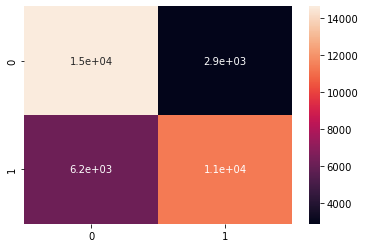

In [43]:
sns.heatmap(confusion_matrix(yresampled,forest_scores),annot=True)

### XGBOOST

#### HYPERPARAMETER TUNING

In [44]:
params={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,7,5],
    'gamma':[.3,0.4,0.5,0.7],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [45]:
xgboost_classifier=xgboost.XGBClassifier()

In [46]:
randomized_search=RandomizedSearchCV(xgboost_classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,verbose=3)

In [47]:
randomized_search.fit(x_scaled,yresampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,
                                           max_c...
                                           n_estimators=100, n_jobs=None,
                                        

In [48]:
xgboost_model=randomized_search.best_estimator_
xgboost_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
xgboost_scores=cross_val_predict(xgboost_model,x_scaled,yresampled,cv=10)

In [50]:
print(classification_report(yresampled,xgboost_scores))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     17523
           1       0.85      0.82      0.83     17523

    accuracy                           0.84     35046
   macro avg       0.84      0.84      0.84     35046
weighted avg       0.84      0.84      0.84     35046



<AxesSubplot:>

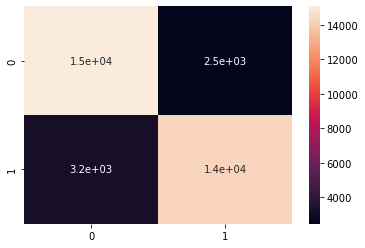

In [51]:
sns.heatmap(confusion_matrix(yresampled,xgboost_scores),annot=True)

### SUPPORT VECTOR MACHINE CLASSIFIER

#### HYPERPARAMETER TUNING

In [52]:
svc=SVC()

In [53]:
params={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[0.1,1,10,100],
    'class_weight':['dict', 'balanced'],
    'gamma':[1,0.1,0.01,0.001],
    'decision_function_shape':['ovo', 'ovr']
}

In [54]:
randomized_search=RandomizedSearchCV(svc,param_distributions=params,n_iter=3,scoring='roc_auc',verbose=3)

In [55]:
randomized_search.fit(x_scaled,yresampled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time= 1.2min
[CV 2/5] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time= 1.3min
[CV 3/5] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time= 1.3min
[CV 4/5] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time= 1.3min
[CV 5/5] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=1, kernel=sigmoid; total time= 1.2min
[CV 1/5] END C=10, class_weight=dict, decision_function_shape=ovr, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END C=10, class_weight=dict, decision_function_shape=ovr, gamma=0.001, kernel=linear; total time=   0.0s
[CV 3/5] END C=10, class_weight=dict, decision_function_shape=ovr, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END C=10,

RandomizedSearchCV(estimator=SVC(), n_iter=3,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'class_weight': ['dict', 'balanced'],
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='roc_auc', verbose=3)

In [56]:
svc_model=randomized_search.best_estimator_
svc_model

SVC(C=0.1, class_weight='balanced', decision_function_shape='ovo', gamma=1,
    kernel='sigmoid')

In [ ]:
svc_scores=cross_val_predict(svc_model,x_scaled,yresampled,cv=10)

In [58]:
print(classification_report(yresampled,svc_scores))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     17523
           1       0.56      0.56      0.56     17523

    accuracy                           0.56     35046
   macro avg       0.56      0.56      0.56     35046
weighted avg       0.56      0.56      0.56     35046



<AxesSubplot:>

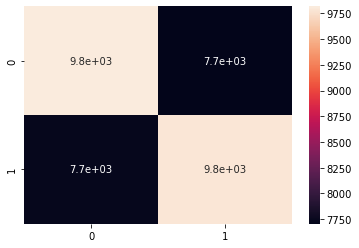

In [59]:
sns.heatmap(confusion_matrix(yresampled,svc_scores),annot=True)

### TESTING

### Data Cleaning and feature engineering
##### Using xgboost model

In [60]:
#feature engineering
binss=np.linspace(xtest['AGE'].min(),xtest['AGE'].max(),4)
labelss=['Young Adults','Adults','Senior citizens']
xtest['AGE_group']=pd.cut(xtest['AGE'],bins=binss,labels=labelss,include_lowest=True)
xtest['AGE_group']=xtest['AGE_group'].astype('object')

gender_map={1:'Male',2:'Female'}

education_map={1:'Graduate School', 2:'University', 3:'High School', 4:'Others', 5:'Unknown', 6:'Unknown'}

partner_map={1:'Married', 2:'Single', 3:'Others'}

default_map={1:'Yes', 0:'No'}

xtest['SEX']=xtest['SEX'].map(gender_map)
xtest['EDUCATION']=xtest['EDUCATION'].map(education_map)
xtest['MARRIAGE']=xtest['MARRIAGE'].map(partner_map)
target=target.map(default_map)

xtest.drop(['ID','AGE'],axis=1,inplace=True)

xtest=pd.get_dummies(xtest,drop_first=True)
xtest=xtest.reset_index(drop=True)

#DEALING WITH IMBALANCE WITH SMOTE
os=SMOTE(random_state=0)

xtest_resampled,ytest_resampled=os.fit_resample(xtest,ytest)

x_test_scaled=scaler.fit_transform(xtest_resampled)

In [61]:
pred=xgboost_model.predict(x_test_scaled)
pred

array([1, 1, 0, ..., 1, 1, 1])

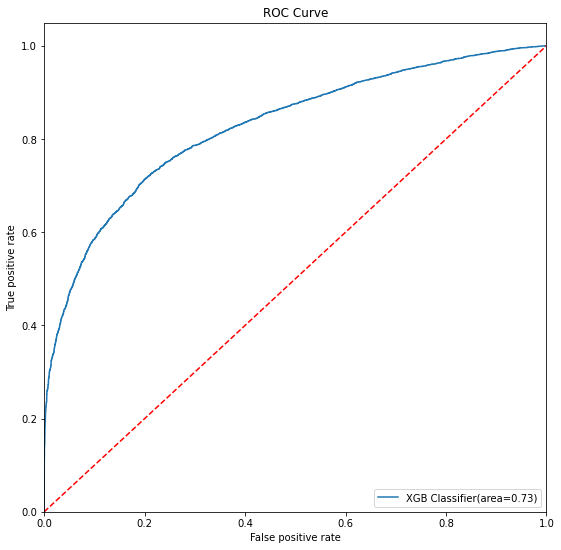

In [66]:
ruc_auc=roc_auc_score(ytest_resampled,pred)

fpr,tpr,thresholds_l=roc_curve(ytest_resampled,xgboost_model.predict_proba(x_test_scaled)[:,1])


plt.figure(figsize=(9,9))

plt.plot(fpr,tpr,label='XGB Classifier(area=%0.2f)'%ruc_auc)


plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='lower right');

### SAVING MODEL

In [67]:
#SAVING MODEL

joblib.dump(xgboost_model,'credit_card_default_predictor.pkl')

['credit_card_default_predictor.pkl']